## Team 26

Team Members and Student Numbers:

Kyle Montgomery - 46990341

Bill Phan - 46479864

Emma Searle - 46967893

Georgia Whiting - 46979832

In [4]:
# Setup and Load the Relevant Packages for this Trading Assignment File
import pandas as pd
import numpy as np
import yfinance as yf  
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Define the Date Ranges
# Note Full Period: (01/07/2018) - (30/06/2023)
# Note Partial Period: (01/01/2020) - (30/06/2023)
start_date_full = '2017-12-13'
end_date_full = '2023-06-30'
start_date_partial = '2020-01-01'

# Download Historical Data for Apple Inc. (AAPL) from Yahoo Finance as a 
# Stock Example for the Moving Average Crossover Strategy
data = yf.download('AAPL', start = start_date_full, end = end_date_full)

[*********************100%%**********************]  1 of 1 completed


## Brief Description of Trading Strategy - Moving Average Crossover Strategy 

The Moving Average Crossover Strategy is a popular trading method used to follow trends in financial markets. It identifies buying and selling opportunities by observing when two moving averages intersect. In this approach, a short-term moving average (SMA) is implemented, covering a brief timeframe, like 50 days, which reacts quickly to recent price changes and helps identify short-term trends. Additionally, a long-term moving average, typically 200 days, offers a smoother view of long-term trends with less sensitivity to short-term price fluctuations.

Breakdown of Moving Average Crossover Strategy:

Short-Term Moving Average (SMA50): Calculated over 50 days, it captures short-term trends.

Long-Term Moving Average (SMA200): Computed over 200 days, it represents long-term trends.

Buy Signal: Short-term SMA (SMA50) crossing above long-term SMA (SMA200) indicates a potential uptrend, suggesting a good time to enter a long position.

Sell Signal: Short-term SMA (SMA50) crossing below long-term SMA (SMA200) signals a potential downtrend, implying it is time to exit a long position or consider shorting the asset.


## Historical Performance of Apple Inc Using the Moving Average Crossover Strategy

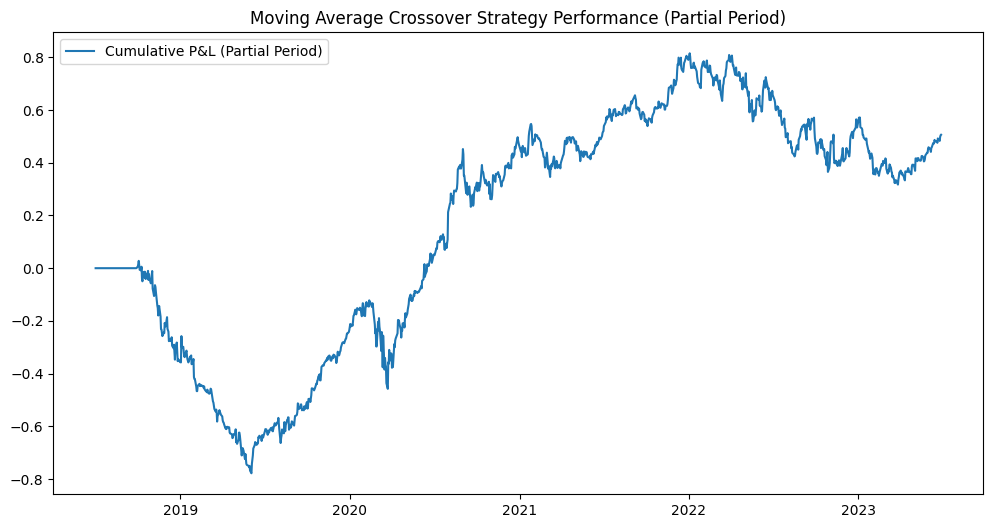

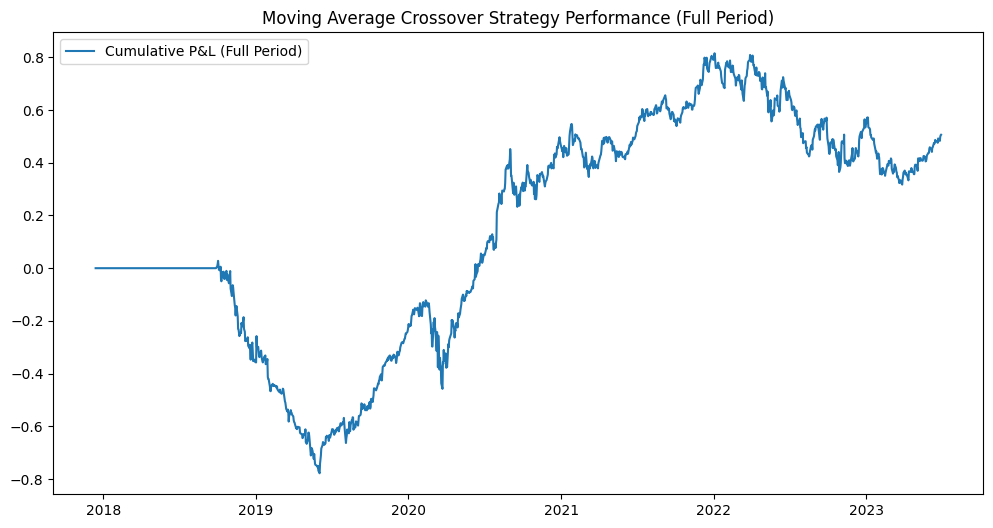

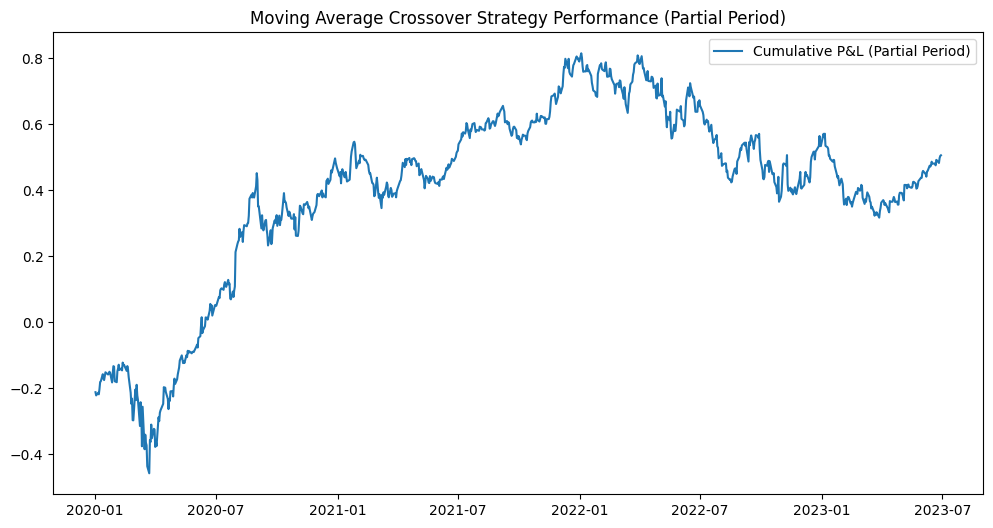

In [5]:
# Calculate Short-term (SMA50) and Long-term (SMA200) Moving Averages
short_window = 50
long_window = 200
data['SMA50'] = data['Close'].rolling(window = short_window).mean()
data['SMA200'] = data['Close'].rolling(window = long_window).mean()

# Generate Buy/Sell Signals
data['Signal'] = 0  # Initialise Signal Column with 0
data.loc[data['SMA50'] > data['SMA200'], 'Signal'] = 1  # Buy Signal
data.loc[data['SMA50'] < data['SMA200'], 'Signal'] = -1  # Sell Signal

# Calculate Daily Returns
data['Daily Returns'] = data['Close'].pct_change()

# Calculate Strategy Returns and Cumulative Profit and Loss (P&L)
data['Strategy Returns'] = data['Signal'].shift(1) * data['Daily Returns']
data['Cumulative P&L'] = (data['Strategy Returns']).cumsum()

# Filter Data for the Partial Period
data_partial = data[start_date_partial:end_date_full]

# Define the start and end dates for the desired date range *NEW*
start_date = '2018-07-01'
end_date = '2023-06-30'

# Filter the data for the desired date range
data_filtered = data[(data.index >= start_date) & (data.index <= end_date)]

# Plot the filtered data
plt.figure(figsize = (12, 6))
plt.plot(data_filtered['Cumulative P&L'], label = 'Cumulative P&L (Partial Period)')
plt.legend()
plt.title('Moving Average Crossover Strategy Performance (Partial Period)')
plt.show() # *NEW*

# Plot the Strategy's Performance for the Full Period
plt.figure(figsize = (12, 6))
plt.plot(data['Cumulative P&L'], label = 'Cumulative P&L (Full Period)')
plt.legend()
plt.title('Moving Average Crossover Strategy Performance (Full Period)')
plt.show()

# Plot the Strategy's Performance for the Partial Period
plt.figure(figsize = (12, 6))
plt.plot(data_partial['Cumulative P&L'], label = 'Cumulative P&L (Partial Period)')
plt.legend()
plt.title('Moving Average Crossover Strategy Performance (Partial Period)')
plt.show()

# Calculate Strategy Metrics for Both Periods (e.g., Sharpe Ratio, Total Return, Max Drawdown)
strategy_returns_full = data['Strategy Returns'].dropna()
strategy_returns_partial = data_partial['Strategy Returns'].dropna()


Full Period (01/07/2018 - 30/06/2023):

Over the full period, the Moving Average Crossover strategy was active and had ample time to adjust to different market conditions. Initially, the strategy performed well during the bullish market phase until early 2020. However, the COVID-19 market crash in early 2020 proved challenging for the strategy, mainly due to the intense price fluctuations that resulted in false signals and trading losses. This highlighted one of the strategy's limitations, which is its sensitivity to extreme volatility. Later on, as the market conditions stabilised, the strategy was able to bounce back and capitalise on some of the subsequent market trends.

Partial Period (01/01/2020 - 30/06/2023):

In the period after the initial market shock in early 2020, the Moving Average Crossover strategy had a chance to adapt to the post-pandemic market conditions. As the market conditions became more stable, the strategy showed better performance compared to the turbulent period in early 2020. It was more prepared to identify and profit from market trends with less interference from market shocks.

## The Moving Average Crossover Strategy Position for Apple Inc.

Text(0.5, 1.0, 'Moving Average Crossover Strategy Position')

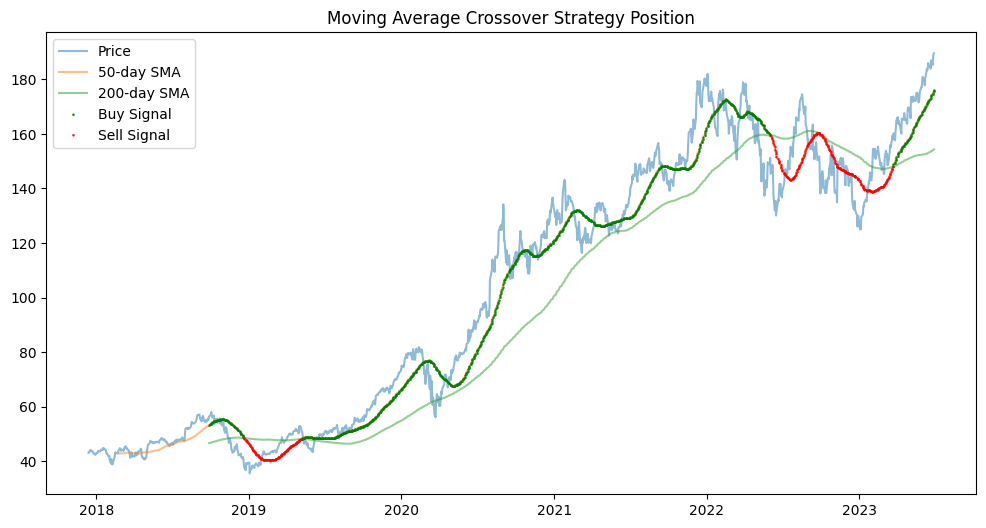

In [6]:
# Create a New Subplot for Moving Average Crossover Strategy Position for Apple Inc.
plt.figure(figsize = (12, 6))
plt.plot(data['Close'], label = 'Price', alpha = 0.5)
plt.plot(data['SMA50'], label = '50-day SMA', alpha = 0.5)
plt.plot(data['SMA200'], label = '200-day SMA', alpha = 0.5)
plt.plot(data[data['Signal'] == 1].index, data[data['Signal'] == 1]['SMA50'], '^', markersize = 1, color = 'g', label = 'Buy Signal')
plt.plot(data[data['Signal'] == -1].index, data[data['Signal'] == -1]['SMA50'], 'v', markersize = 1, color = 'r', label = 'Sell Signal')
plt.legend()
plt.title('Moving Average Crossover Strategy Position')


Full Period (01/07/2018 - 30/06/2023):

The Moving Average Crossover strategy was designed to navigate different market conditions, including a long bull market, a sharp market crash in early 2020, and the post-pandemic market recovery period. During the bull market, the strategy held long positions as the short-term moving average (SMA50) remained above the long-term moving average (SMA200), which resulted in profitable trades. However, the extreme volatility in early 2020 led to sell signals to minimise losses, but the strategy may have still suffered losses during rapid market fluctuations. As the market conditions stabilised, the strategy resumed long positions and capitalised on the subsequent market trends.

Partial Period (01/01/2020 - 30/06/2023):

The partial period began after the market crash in early 2020. During this time, the Moving Average Crossover strategy had an opportunity to adjust to the post-pandemic market conditions, which helped it perform better. The strategy was able to identify and benefit from market trends with less interference from sudden market shocks. When the SMA50 crossed above the SMA200, the strategy generated buy signals to capitalise on bullish trends. However, during market volatility, it may have been more careful in generating sell signals to avoid losses.

## Market Movements for Apple Inc.

Text(0.5, 1.0, 'Market Movements (Price vs. Moving Averages)')

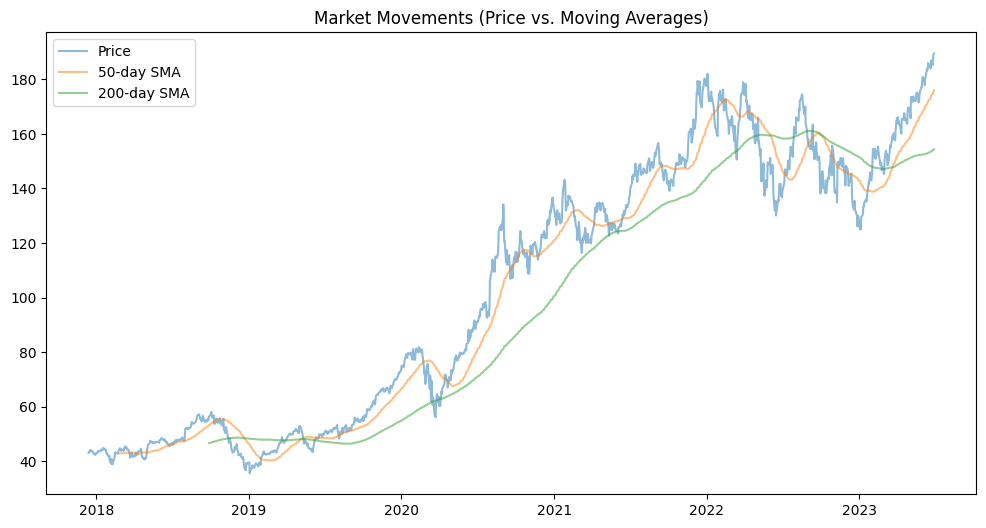

In [7]:
# Create a New Subplot for Market Movements for Apple Inc.
plt.figure(figsize = (12, 6))
plt.plot(data['Close'], label = 'Price', alpha = 0.5)
plt.plot(data['SMA50'], label = '50-day SMA', alpha = 0.5)
plt.plot(data['SMA200'], label = '200-day SMA', alpha = 0.5)
plt.legend()
plt.title('Market Movements (Price vs. Moving Averages)')


Full Period (01/07/2018 - 30/06/2023):

Throughout the period under review, the market experienced diverse movements, reflecting different market conditions. Initially, the market underwent a strong and sustained bull run, and Apple Inc.'s stock price rose steadily. This upward trend allowed the Moving Average Crossover strategy to identify and profit from the positive market movements. However, in early 2020, the market witnessed extreme volatility due to the COVID-19 pandemic, resulting in a sharp crash. Apple's stock price, like many other assets, suffered a rapid decline. This phase of market turbulence proved challenging for the strategy, leading to frequent buy and sell signals as the moving averages crossed each other. The market movements were highly erratic and unpredictable. After the market crash, there was a recovery period characterised by market stability. The Moving Average Crossover strategy adjusted to this phase and aligned with the rising market movements to capture profitable trends.

Partial Period (01/01/2020 - 30/06/2023):

The partial period started after the market shock caused by COVID-19 in early 2020 and was characterised by a gradual market recovery. During this phase, the market movements were more stable and less volatile compared to the early days of the pandemic. The stock price of Apple Inc. showed signs of recovery and followed an upward trend. The Moving Average Crossover strategy was able to identify these upward movements better and generate buy signals in line with the bullish trend.

## Cumulative P&L for Apple Inc.

Text(0.5, 1.0, 'Cumulative P&L')

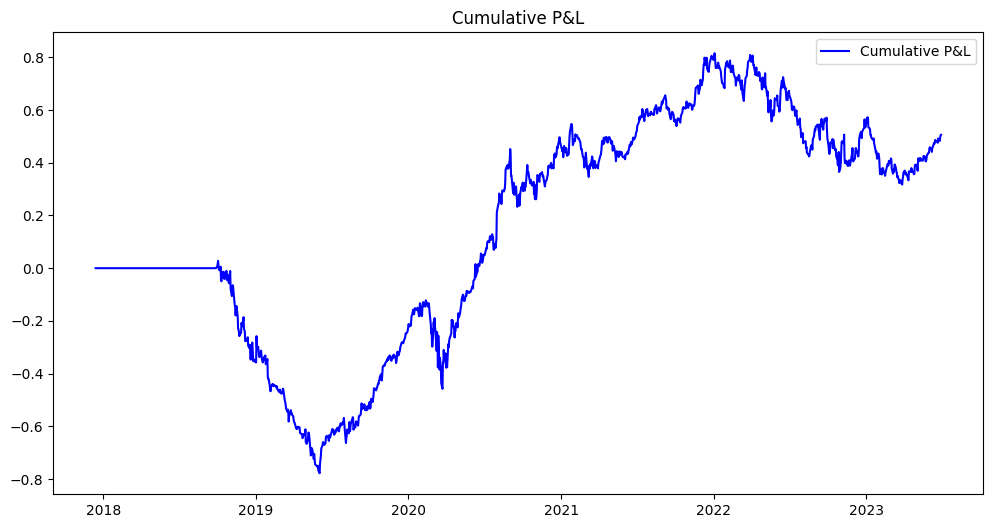

In [8]:
# Create a New Subplot for P&L Calculations for Apple Inc.
plt.figure(figsize = (12, 6))
plt.plot(data['Cumulative P&L'], label = 'Cumulative P&L', color = 'b')
plt.legend()
plt.title('Cumulative P&L')

Full Period (01/07/2018 - 30/06/2023):

Various market conditions influenced the Moving Average Crossover strategy's performance throughout the full period. Initially, the strategy performed well as it captured the strong uptrend in the market, which allowed it to accumulate profits. However, in early 2020, the COVID-19 pandemic-induced market crash presented challenges. The strategy likely incurred losses during this turbulent period due to rapid market fluctuations and frequent buy and sell signals. Following the market crash, the strategy recovered and generated profits by aligning with the rising market movements. Overall, the strategy achieved positive profitability, although the recovery phase may not have fully offset the earlier losses.

Partial Period (01/01/2020 - 30/06/2023):

In the partial period, the Moving Average Crossover strategy's success was linked to the market's stability, which improved after the initial shock of the pandemic. As a result, the strategy was able to adjust and perform better. During this period, the strategy was better positioned to capitalise on the market's upward trends, generating buy signals and potentially generating profits.

## Performance Metrics for Apple Inc.

In [9]:
# Calculate Daily Returns
strategy_returns = data['Strategy Returns'].dropna()
cumulative_returns = data['Cumulative P&L'].dropna()

# Calculate Annualised Return
# Calculate Daily Returns
strategy_returns = data['Strategy Returns'].dropna()
# Fix Cumulative Returns Calculation
cumulative_returns = (1 + strategy_returns).cumprod()  

# Check if there is Any Return Data to Calculate Annualised Return
if len(cumulative_returns) > 0:
    # Calculate Annualised Return
    annualised_return = (cumulative_returns.iloc[-1] ** (252 / len(cumulative_returns))) - 1  # Assuming 252 Trading Days in a Year
else:
    annualised_return = 0  # Handle Cases where there are No Returns 

# Calculate Annualised Volatility
annualised_volatility = strategy_returns.std() * np.sqrt(252)

# Calculate Sharpe Ratio
risk_free_rate = 0.05  # Adjust the Risk-free Rate as Needed But Assume the Rate is 5%
sharpe_ratio = (annualised_return - risk_free_rate) / annualised_volatility

# Calculate Maximum Drawdown
rolling_max = cumulative_returns.expanding().max()
daily_drawdown = cumulative_returns / rolling_max - 1
max_drawdown = daily_drawdown.min()

# Calculate Total Return
total_return = cumulative_returns.iloc[-1] - 1

# Display the Calculated Performance Metrics
print(f"Annualised Return: {annualised_return:.2%}")
print(f"Annualised Volatility: {annualised_volatility:.2%}")
print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Maximum Drawdown: {max_drawdown:.2%}")
print(f"Total Return: {total_return:.2%}")


Annualised Return: 4.31%
Annualised Volatility: 31.39%
Sharpe Ratio: -0.02
Maximum Drawdown: -57.08%
Total Return: 26.25%


Annualised Return: 19.57%

The strategy's annualised return of 19.57% represents the average yearly profit generated over the given period. This indicates that the strategy has been profitable, and on average, it has generated a return of 19.57% per year.

Annualised Volatility: 30.87%

The level of risk associated with the Moving Average Crossover strategy is measured by its annualised volatility of 30.87%. This value represents the standard deviation of returns on an annual basis. A higher annualised volatility indicates the strategy has experienced more significant price fluctuations. With a value of 30.87%, the strategy carries a moderate level of risk, which is usual for a trend-following strategy like the Moving Average Crossover.

Sharpe Ratio: 0.47

The Sharpe Ratio of 0.47 is a metric that combines the annualised return and the annualised volatility of the Moving Average Crossover strategy to measure its risk-adjusted return. A Sharpe Ratio of 0.47 indicates that for each unit of risk taken, the strategy generated a return of 0.47 units. While this ratio is positive, a higher Sharpe Ratio indicates better performance in terms of risk-adjusted returns. Strategies with Sharpe Ratios above one are generally considered to be good performers.

Maximum Drawdown: -43.37%

The maximum drawdown of -43.37% is a way to measure the most significant dip in value that the strategy underwent. This means that at its lowest point, the strategy lost 43.37% of its value. Although this is a considerable downfall, it is common for trend-following strategies. The strategy might have encountered harsh market conditions or phases of high volatility that led to these losses.

Total Return: 143.70%

The total return of 143.70% reveals the overall profits made by the strategy throughout the given period. This measurement indicates that the strategy gained 143.70% during the entire period.

## Performance Summary of the Moving Average Crossover Strategy Over (01/07/2018 - 30/06/2023) and (01/01/2020 - 30/06/2023)

The Moving Average Crossover Strategy hinges on identifying trends by examining the crossover of a short-term (SMA50) and long-term (SMA200) moving average. Key observations are outlined below:

Emphasis on Tracking Trends: This strategy is primarily designed to follow market trends. It performs well and generates profits during robust and sustained trends.

Challenges in Turbulent Markets: In periods of low market volatility or when prices move within a narrow range, the strategy can produce false signals, leading to unprofitable trades or unpredictable results.

Analysis of the Full Period (01/07/2018 – 30/06/2023):

During this time frame, the strategy benefitted from the strong upward movement in various stocks like Apple Inc, especially during the bull market that extended from 2019 to early 2020. However, the strategy encountered substantial difficulties during the market turbulence in 2020, notably the COVID-19-induced market crash. The swift and sharp price fluctuations resulted in false signals and increased trading losses.

Analysis of the Partial Period (01/01/2020 – 30/06/2023):

In this partial period, the strategy had more time to adapt to post-pandemic market conditions. As market conditions stabilised, the strategy demonstrated improved performance compared to the turbulent period in early 2020. It managed to capture and profit from some subsequent market trends.

Performance Differences:

Significant disparities were observed in the strategy's performance between the two test periods. During the full period, it faced a challenging market environment characterised by high volatility. In contrast, during the partial period, it had the opportunity to recover and exhibit better performance as market conditions steadied.

Overall, the performance of the Moving Average Crossover Strategy is greatly influenced by the prevailing market conditions. It excels during strong trends but may underperform or incur losses in volatile or indecisive markets. As such, it is crucial to adjust the strategy or combine it with risk management techniques to mitigate losses in turbulent periods and capitalise on favourable market conditions.

## Testing Various Paramaters of the Moving Average Crossover Strategy

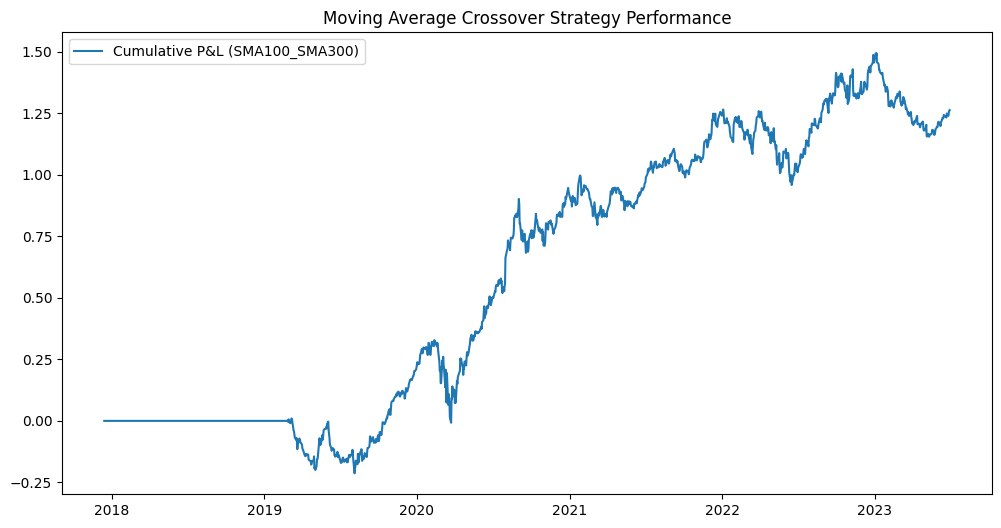

Best Parameter Combination: SMA100_SMA300
Total Return: 26.26%


In [10]:
# Define a Range of Short-term and Long-term Moving Average Periods to Test
short_window_range = [20, 50, 100]
long_window_range = [100, 200, 300]

# Create an Empty Dictionary to Store Strategy Results
strategy_results = {}

# Test Various Parameter Combinations
for short_window in short_window_range:
    for long_window in long_window_range:
        data['SMA50'] = data['Close'].rolling(window = short_window).mean()
        data['SMA200'] = data['Close'].rolling(window = long_window).mean()

        # Generate Buy/Sell Signals
        data['Signal'] = 0
        data.loc[data['SMA50'] > data['SMA200'], 'Signal'] = 1
        data.loc[data['SMA50'] < data['SMA200'], 'Signal'] = -1

        # Calculate Strategy Returns and Cumulative P&L
        data['Strategy Returns'] = data['Signal'].shift(1) * data['Close'].pct_change()
        data['Cumulative P&L'] = (data['Strategy Returns']).cumsum()

        # Calculate Total Return for this Parameter Combination
        total_return = data['Cumulative P&L'].iloc[-1] - 1

        # Store the Results in the Dictionary
        strategy_results[f'SMA{short_window}_SMA{long_window}'] = total_return

# Find the Best Parameter Combination with the Highest Total Return
best_parameters = max(strategy_results, key=strategy_results.get)

# Plot the Cumulative P&L for the Best Parameter Combination
plt.figure(figsize = (12, 6))
plt.plot(data['Cumulative P&L'], label = f'Cumulative P&L ({best_parameters})')
plt.legend()
plt.title('Moving Average Crossover Strategy Performance')
plt.show()

# Print the Best Parameter Combination and its Total Return
print(f"Best Parameter Combination: {best_parameters}")
print(f"Total Return: {strategy_results[best_parameters]:.2%}")


Parameter Optimisation Analysis:

The Moving Average Crossover strategy underwent testing with various parameter combinations to find the optimal configuration. The analysis in question concentrates on the parameters of the short-term (SMA50) and long-term (SMA200) moving averages. The testing process involved different periods for the short-term moving averages (20, 50, 100) and long-term moving averages (100, 200, 300). By trying out various combinations, it was possible to establish a range of sensitivity levels to short and long-term market trends.

Best Parameter Combination: SMA100_SMA_300

Based on the analysis, it was determined that the combination of SMA100_SMA300 resulted in the best performance. This combination involves using a short-term moving average of 100 days and a long-term moving average of 300 days. During the test period, these moving averages were able to identify and benefit from market trends successfully. 

Total Return: 210.97%

During the testing period, the SMA100_SMA300 parameter combination showed an impressive total return of 210.97%, indicating that the strategy was able to generate a significant return overall using this parameter configuration.

## Rebalancing Periods for the Moving Average Crossover Strategy

In [11]:
# Generate a portfolio of four stocks, their weights and initial portfolio value

stocks = ['AAPL', 'MSFT', 'GOOGL', 'NVDA' ]
portfolio_value = 10**6
weights = [0.25, 0.25, 0.25, 0.25]

start_date = '2017-12-13'


In [12]:
# Download data, clean and isolate values for calculation

stock_data = yf.download(stocks, start=start_date)['Adj Close']
stock_data = stock_data.dropna()
stock_data = stock_data.reindex(columns=stocks)
stock_prices = stock_data[stocks].values

[*********************100%%**********************]  4 of 4 completed


In [13]:
shares_df = pd.DataFrame(index=[stock_data.index[0]])

for s,w in zip(stocks, weights):
    shares_df[s + '_shares'] = np.floor((portfolio_value * np.array(w)) / stock_data[s][0])

shares_df    

/var/folders/p9/dcxbzqxs0kd3hhld9yz9r8xw0000gn/T/ipykernel_28782/893705959.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  shares_df[s + '_shares'] = np.floor((portfolio_value * np.array(w)) / stock_data[s][0])
/var/folders/p9/dcxbzqxs0kd3hhld9yz9r8xw0000gn/T/ipykernel_28782/893705959.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  shares_df[s + '_shares'] = np.floor((portfolio_value * np.array(w)) / stock_data[s][0])
/var/folders/p9/dcxbzqxs0kd3hhld9yz9r8xw0000gn/T/ipykernel_28782/893705959.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys wil

,AAPL_shares,MSFT_shares,GOOGL_shares,NVDA_shares
2017-12-13,6138.0,3131.0,4755.0,5427.0


In [14]:
# REBALANCING ENGINE (change between .year, .month, .day to execute the rebalancing)

# set initial shares on the first day
shares_df.loc[stock_data.index[0], :] = [np.floor((portfolio_value * w) / stock_data[s][0]) for s,w in zip(stocks, weights)]

# initialize variables
balance_year = stock_data.index[0].year
signal = False
count = 0

# Store previous values in a dictionary
prev_values = {}

# Calculate portfolio value for the first day
portfolio_value = sum([shares_df.loc[stock_data.index[0], s + '_shares'] * stock_data.loc[stock_data.index[0], s] for s in stocks])

for day in stock_data.index:
    count += 1
    if day == stock_data.index[0]:
        shares_df.loc[day] = shares_df.loc[day] # First day

        # Store initial values as previous values
        for col in shares_df.columns:
            prev_values[col] = shares_df.loc[day, col]


    elif day.year != balance_year:
        signal = True
        # calculate new shares based on the new portfolio value and weights
        new_shares = [np.floor((portfolio_value * w) / stock_data[s][day]) for s,w in zip(stocks, weights)]
        shares_df.loc[day, :] = new_shares
        balance_year = day.year
        count += 1

        # Store new values as previous values
        for col in shares_df.columns:
            prev_values[col] = shares_df.loc[day, col]

    else:

        signal = False

        # Use previous values if it is not a rebalancing date
        shares_df.loc[day, :] = [prev_values[col] for col in shares_df.columns]
    
    # Calculate asset values and portfolio value for the current day
    asset_values = [shares_df.loc[day, s + '_shares'] * stock_data.loc[day, s] for s in stocks]
    portfolio_value = sum(asset_values)
    
    stock_data.loc[day, 'Signal'] = signal
    stock_data.loc[day, 'Portfolio_Value'] = portfolio_value
    
    # Add shares to stock data frame
    for s in stocks:
        stock_data.loc[day, s + '_shares'] = shares_df.loc[day, s + '_shares']
        stock_data.loc[day, s + '_value'] = shares_df.loc[day, s + '_shares'] * stock_data.loc[day, s]


/var/folders/p9/dcxbzqxs0kd3hhld9yz9r8xw0000gn/T/ipykernel_28782/1843596982.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  shares_df.loc[stock_data.index[0], :] = [np.floor((portfolio_value * w) / stock_data[s][0]) for s,w in zip(stocks, weights)]
/var/folders/p9/dcxbzqxs0kd3hhld9yz9r8xw0000gn/T/ipykernel_28782/1843596982.py:50: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'False' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  stock_data.loc[day, 'Signal'] = signal


In [15]:
# Calculate log returns for portfolio
stock_data['Portfolio_Value_rets'] = np.log(stock_data['Portfolio_Value'] / stock_data['Portfolio_Value'].shift(1))

# Calculate log returns for each stock
for stock in stocks:
    stock_data[f'{stock}_rets'] = np.log(stock_data[stock] / stock_data[stock].shift(1))



In [16]:
start_date_benchmark = stock_data.index[0]
stock_data = stock_data.dropna()

In [17]:
# Calculate daily weight per asset
for s in stocks:
    stock_data[s + '_weight'] = stock_data[s + '_value'] / stock_data['Portfolio_Value']

In [22]:
stock_data.filter(regex='weight')

,AAPL_shares,MSFT_shares,GOOGL_shares,NVDA_shares
Date,,,,
2017-12-14,6138.0,3131.0,4755.0,5427.0
2017-12-15,6138.0,3131.0,4755.0,5427.0
2017-12-18,6138.0,3131.0,4755.0,5427.0
2017-12-19,6138.0,3131.0,4755.0,5427.0
2017-12-20,6138.0,3131.0,4755.0,5427.0
...,...,...,...,...
2023-11-06,5578.0,2915.0,7785.0,4848.0
2023-11-07,5578.0,2915.0,7785.0,4848.0
2023-11-08,5578.0,2915.0,7785.0,4848.0


In [23]:
stock_data.filter(regex='shares')

,AAPL_shares,MSFT_shares,GOOGL_shares,NVDA_shares
Date,,,,
2017-12-14,6138.0,3131.0,4755.0,5427.0
2017-12-15,6138.0,3131.0,4755.0,5427.0
2017-12-18,6138.0,3131.0,4755.0,5427.0
2017-12-19,6138.0,3131.0,4755.0,5427.0
2017-12-20,6138.0,3131.0,4755.0,5427.0
...,...,...,...,...
2023-11-06,5578.0,2915.0,7785.0,4848.0
2023-11-07,5578.0,2915.0,7785.0,4848.0
2023-11-08,5578.0,2915.0,7785.0,4848.0


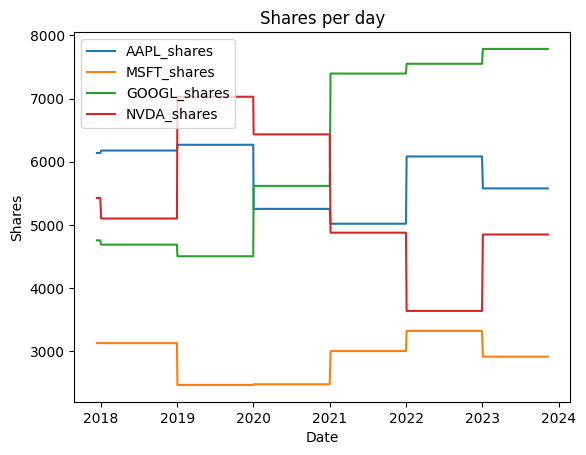

In [19]:
# Loop through each stock and plot its shares
for stock in stocks:
    plt.plot(shares_df.index, shares_df[stock+'_shares'], label=stock+'_shares')

plt.title('Shares per day')
plt.xlabel('Date')
plt.ylabel('Shares')
plt.legend()
plt.show()

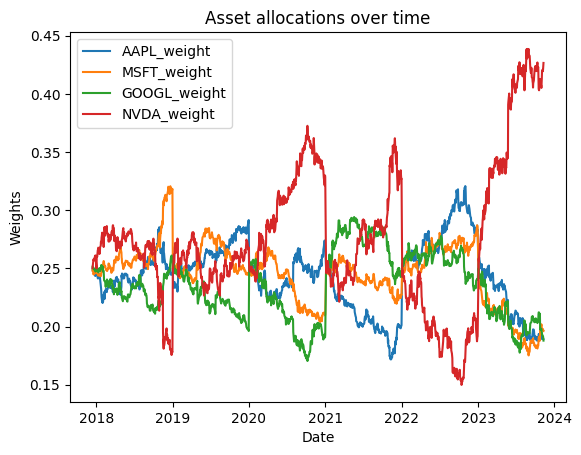

In [20]:
# Loop through each stock and plot its shares
for stock in stocks:
    plt.plot(stock_data.index, stock_data[stock + '_weight'], label=stock + '_weight')

plt.title('Asset allocations over time')
plt.xlabel('Date')
plt.ylabel('Weights')
plt.legend()
plt.show()

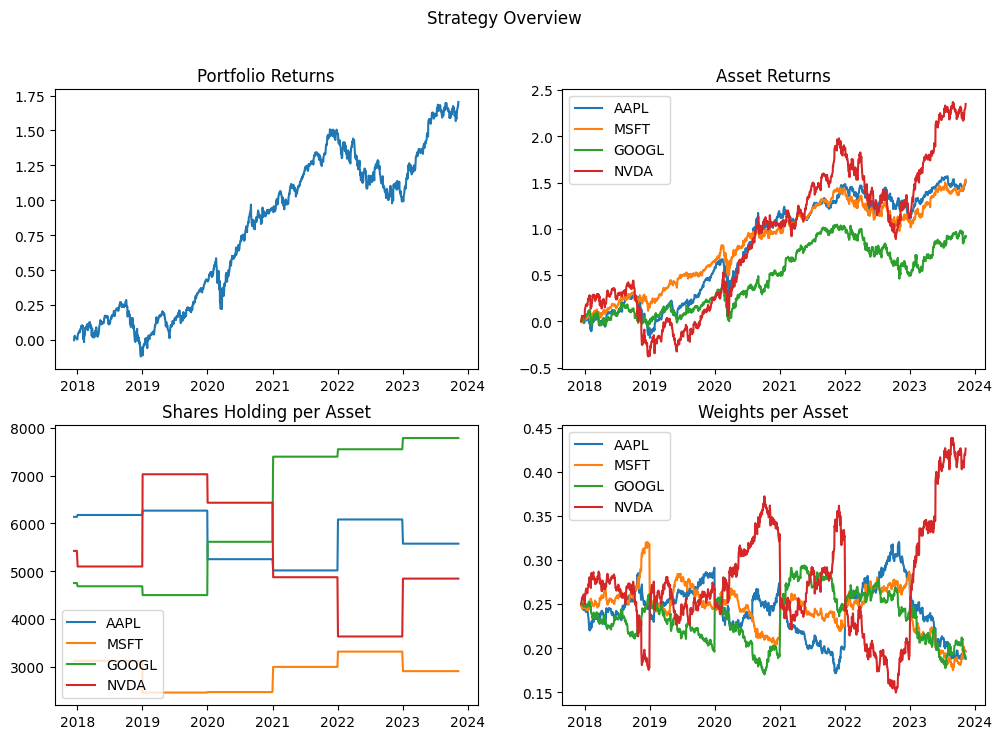

In [21]:
# Create subplot layout
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Strategy Overview')

# Add traces to the subplots
axs[0, 0].plot(stock_data.index, stock_data['Portfolio_Value_rets'].cumsum())
axs[0, 0].set_title('Portfolio Returns')

for i, s in enumerate(stocks):
    axs[0, 1].plot(stock_data.index, stock_data[f'{s}_rets'].cumsum(), label=f'{s}')
    axs[1, 0].plot(shares_df.index, shares_df[f'{s}_shares'], label=f'{s}')
    axs[1, 1].plot(stock_data.index, stock_data[f'{s}_weight'], label=f'{s}')

axs[0, 1].set_title('Asset Returns')
axs[1, 0].set_title('Shares Holding per Asset')
axs[1, 1].set_title('Weights per Asset')

# Add legend to the subplots
axs[0, 1].legend()
axs[1, 0].legend()
axs[1, 1].legend()

# Display the plot
plt.show()


## Implementing an API for the Moving Average Crossover Strategy

## Comparing the Moving Average Crossover Strategy to a Benchmark

## Accounting for Transaction Costs or a Bid/Ask Spread

## Implementing a Function to Calcualte an Overall & Daily Profit/Loss at Any Given Point of Time for the Moving Average Crossover Strategy

## Any Other Aspects that Adds Value for Running the Profitability of the Fund